<a href="https://colab.research.google.com/github/anjana-c-maker/Heart_Disease_Predictor/blob/main/Heart_Disease_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
#Load the dataset
data = pd.read_csv('/content/drive/MyDrive/heart_disease_data.csv')


In [49]:
# Display dataset summary
print("Dataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Summary Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337

In [8]:
data['target'].value_counts()

,count
target,
1,165
0,138


In [23]:
print(data.dtypes)


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


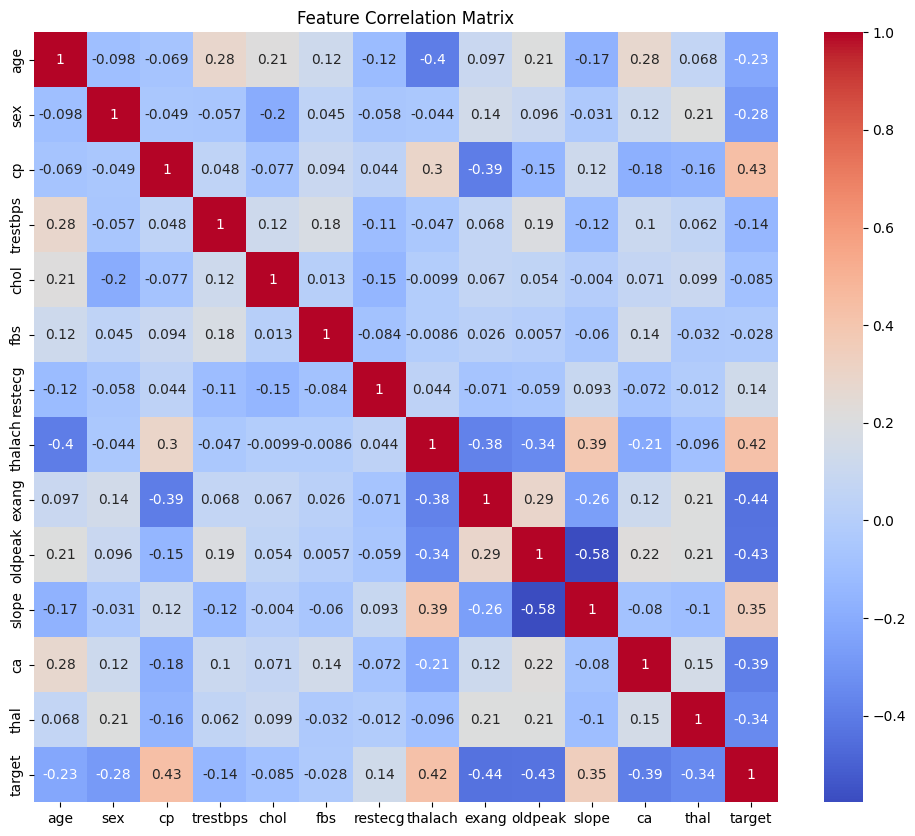

In [52]:
# Correlation matrix and heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [51]:
# Separate features (X) and target (y)
X = data.drop(columns='target', axis=1)

In [10]:
Y = data['target']

In [12]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [13]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [31]:
#spiliting the data into trainset and test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state=42)

In [30]:
print(X_train.shape, X_test.shape)

(242, 13) (61, 13)


In [53]:
# Dictionary to store accuracy scores for comparison
model_accuracies = {}

# **Logistic Regression**

In [57]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, Y_train)
#predictions on train data
predictions = model.predict(X_test)
log_accuracy = accuracy_score(Y_test, predictions)
model_accuracies['Logistic Regression'] = log_accuracy
print(f"\nAccuracy (Logistic Regression): {log_accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(Y_test, predictions))
# Confusion Matrix
cm = confusion_matrix(Y_test, predictions)
print("\nConfusion Matrix:\n", cm)


Accuracy (Logistic Regression): 88.52%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


Confusion Matrix:
 [[25  4]
 [ 3 29]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Random Forest Classifier**


In [65]:
# Use Random Forest as the base estimator for RFE
model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10)  # Select top 10 features
# Fit RFE to the training data
rfe.fit(X_train, Y_train)
# Get the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)

# Subset the dataset with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the model with selected features
model.fit(X_train_selected, Y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test_selected)
rf_accuracy = accuracy_score(Y_test, y_pred)
model_accuracies['Random Forest'] = rf_accuracy
print(f"\nAccuracy (Random Forest): {rf_accuracy * 100:.2f}%")



Selected features: Index(['age', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal'],
      dtype='object')

Accuracy (Random Forest): 85.25%


# **SVM Classifier**

In [63]:
from sklearn.svm import SVC

# Train an SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  # RBF kernel for non-linear relationships
svm_model.fit(X_train, Y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate accuracy
svm_accuracy = accuracy_score(Y_test, y_pred)
model_accuracies['SVM'] = svm_accuracy
print(f"\nAccuracy (SVM): {svm_accuracy * 100:.2f}%")




Accuracy (SVM): 70.49%


# **Comparison of the model accuracies**

In [60]:
# Compare model accuracies
print("\nModel Accuracy Comparison:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy * 100:.2f}%")


Model Accuracy Comparison:
Logistic Regression: 88.52%
Random Forest: 85.25%
SVM: 70.49%
